In [ ]:
!pip install wfdb==1.3.9
from google.colab import drive
drive.mount('/content/drive')
!cp "/content/drive/MyDrive/ecg_data_with_labels-5_cleaned-6.csv" -r "/content"
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

In [2]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
#from statistics import mean
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import numpy as np

df = pd.read_csv("/content/ecg_data_with_labels-5_cleaned-6.csv")

X = df.iloc[:, 4:238].values

Y = df.label

Y = np.array(Y)

label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)




oversample = SMOTE()
over_X, over_Y = oversample.fit_resample(X, Y)
over_X_train, over_X_test, over_Y_train, over_Y_test = train_test_split(over_X, over_Y, test_size=0.33, stratify=over_Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, stratify=Y)
over_X_train = np.array(over_X_train).reshape(over_X_train.shape[0], X_train.shape[1], 1)
over_X_test = np.array(over_X_test).reshape(over_X_test.shape[0], X_test.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)
over_X_test.shape, over_Y_test.shape, over_X_train.shape, over_Y_train.shape

((307255, 234, 1), (307255,), (623818, 234, 1), (623818,))

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout





# Create sequential model 
cnn_model = tf.keras.models.Sequential()


cnn_model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (X_train.shape[1],1)))


cnn_model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))


cnn_model.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))


cnn_model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
cnn_model.add(Dropout(0.5))


cnn_model.add(Flatten())


cnn_model.add(Dense(units = 256, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))


cnn_model.add(Dense(units = 512, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))


cnn_model.add(Dense(units = 13, activation='softmax'))





In [4]:
cnn_model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 234, 32)           128       
                                                                 
 conv1d_1 (Conv1D)           (None, 234, 64)           6208      
                                                                 
 conv1d_2 (Conv1D)           (None, 234, 128)          24704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 117, 128)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 117, 128)          0         
                                                                 
 flatten (Flatten)           (None, 14976)             0         
                                                        

In [8]:
import matplotlib.pyplot as plt
cnn_model_history = cnn_model.fit(over_X_train, over_Y_train, epochs=10, batch_size = 64, validation_data = (over_X_test, over_Y_test))

cnn_model_history.history['accuracy']

Epoch 1/10
9748/9748 [==============================] - 1724s 177ms/step - loss: 0.2335 - accuracy: 0.9197 - val_loss: 0.1554 - val_accuracy: 0.9472
Epoch 2/10
9748/9748 [==============================] - 1735s 178ms/step - loss: 0.1330 - accuracy: 0.9538 - val_loss: 0.0937 - val_accuracy: 0.9673
Epoch 3/10
9748/9748 [==============================] - 1735s 178ms/step - loss: 0.0933 - accuracy: 0.9676 - val_loss: 0.0671 - val_accuracy: 0.9773
Epoch 4/10
9748/9748 [==============================] - 1734s 178ms/step - loss: 0.0726 - accuracy: 0.9749 - val_loss: 0.0536 - val_accuracy: 0.9823
Epoch 5/10
9748/9748 [==============================] - 1726s 177ms/step - loss: 0.0606 - accuracy: 0.9793 - val_loss: 0.0498 - val_accuracy: 0.9841
Epoch 6/10
9748/9748 [==============================] - 1732s 178ms/step - loss: 0.0518 - accuracy: 0.9822 - val_loss: 0.0459 - val_accuracy: 0.9855
Epoch 7/10
9748/9748 [==============================] - 1727s 177ms/step - loss: 0.0460 - accuracy: 0.9843

[0.9196785092353821,
 0.9537733793258667,
 0.9676443934440613,
 0.9749478101730347,
 0.9792696237564087,
 0.9822255969047546,
 0.9842742681503296,
 0.9860632419586182,
 0.9869705438613892,
 0.9880846738815308]

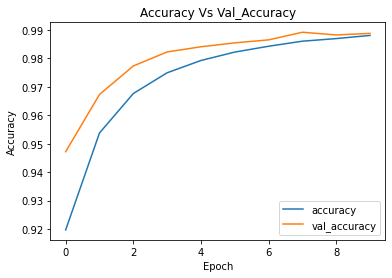

In [10]:

plt.plot(cnn_model_history.history['accuracy'])
plt.plot(cnn_model_history.history['val_accuracy'])
plt.legend(["accuracy","val_accuracy"])
plt.title('Accuracy Vs Val_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

Text(0, 0.5, 'Loss')

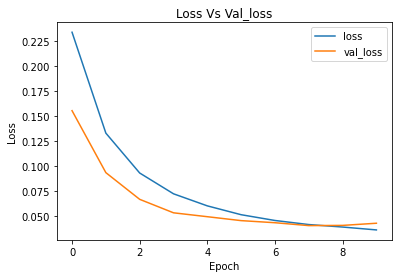

In [11]:
plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.title('Loss Vs Val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [17]:
from numpy import mean
from numpy import std
accuracies=[]
for i in range(0,5):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, stratify=Y)
  _, accuracy = cnn_model.evaluate(X_test, Y_test, batch_size=64, verbose=0)
  accuracies.append(accuracy)
m, s = mean(accuracies), std(accuracies)
print("Accuracy: ", m, " +- ", s)

Accuracy:  0.9569302082061768  +-  0.0003562129709384854


In [18]:
import os

directory = os.getcwd()

In [ ]:
cnn_model.save_weights(directory)
cnn_model.save('/content/modelcnn') 

In [21]:
!cp "/content/modelcnn" -r "/content/drive/MyDrive"